# Clustering Assignment
The steps that will be performed in the exercise are:

1. Read and understand the data
2. Clean the data
3. Prepare the data for modelling (Perform PCA)
4. Modelling (KMeans, and Hierarchical clustering)
5. Final analysis

## 1. Read and understand the data

In [1]:
# Importing the required libararies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Loading the given dataset
master_df=pd.read_csv("Country-data.csv")
master_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
# Checking the null values in the dataset
master_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


In [4]:
## Transforming int64 type variables as float variables
master_df['income'] = master_df['income'].astype(float)
master_df['gdpp'] = master_df['gdpp'].astype(float)
master_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null float64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null float64
dtypes: float64(9), object(1)
memory usage: 13.1+ KB


In [5]:
# Checking if there are any null values present in the dataset
master_df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [6]:
## After going through column descriptions, 'exports', 'health', 'imports' columns are percentages of total GDP.
## E.g. 
## %exports * GDP = Total exports
## Since GDP is missing, and GDPP is given in question
## %exports * GDPP * population = Total exports
## %exports * GDPP = Total exports/population
## %exports * GDPP = Total export per person
## We will be using the above calculation for 'imports', and 'health' column too
master_df["export_value"] = master_df["exports"] * master_df["gdpp"]
master_df["health_value"] = master_df["health"] * master_df["gdpp"]
master_df["imports_value"] = master_df["imports"] * master_df["gdpp"]
master_df.head()


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,export_value,health_value,imports_value
0,Afghanistan,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.82,553.0,5530.0,4191.74,24829.7
1,Albania,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090.0,114520.0,26789.50,198774.0
2,Algeria,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.89,4460.0,171264.0,18598.20,140044.0
3,Angola,119.0,62.3,2.85,42.9,5900.0,22.40,60.1,6.16,3530.0,219919.0,10060.50,151437.0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100.0,1.44,76.8,2.13,12200.0,555100.0,73566.00,718580.0


In [7]:
master_df.drop(["exports", "health", "imports"], axis=1, inplace=True)
master_df.head()

,country,child_mort,income,inflation,life_expec,total_fer,gdpp,export_value,health_value,imports_value
0,Afghanistan,90.2,1610.0,9.44,56.2,5.82,553.0,5530.0,4191.74,24829.7
1,Albania,16.6,9930.0,4.49,76.3,1.65,4090.0,114520.0,26789.50,198774.0
2,Algeria,27.3,12900.0,16.10,76.5,2.89,4460.0,171264.0,18598.20,140044.0
3,Angola,119.0,5900.0,22.40,60.1,6.16,3530.0,219919.0,10060.50,151437.0
4,Antigua and Barbuda,10.3,19100.0,1.44,76.8,2.13,12200.0,555100.0,73566.00,718580.0


In [8]:
# All columns have 167 entries and no null values are present.
# So, null value imputation is not required.
# Checking the values of the different columns of the data frame
master_df.describe()

,child_mort,income,inflation,life_expec,total_fer,gdpp,export_value,health_value,imports_value
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,1.670000e+02,167.000000,1.670000e+02
mean,38.270060,17144.688623,7.781832,70.555689,2.947964,12964.155689,7.420619e+05,105673.320419,6.588352e+05
std,40.328931,19278.067698,10.570704,8.893172,1.513848,18328.704809,1.797389e+06,180140.890556,1.471081e+06
min,2.600000,609.000000,-4.210000,32.100000,1.150000,231.000000,1.076920e+02,1282.120000,6.510920e+01
25%,8.250000,3355.000000,1.810000,65.300000,1.795000,1330.000000,4.471400e+04,7853.550000,6.402150e+04
50%,19.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000,1.777440e+05,32188.600000,2.045580e+05
75%,62.100000,22800.000000,10.750000,76.800000,3.880000,14050.000000,7.278000e+05,97694.000000,7.719600e+05
max,208.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000,1.837500e+07,866360.000000,1.491000e+07


## 2. Clean the data
#### Checking and treating outliers

In [9]:
# Checking outliers at 25%,50%,75%,90%,95% and 99%
master_df.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,child_mort,income,inflation,life_expec,total_fer,gdpp,export_value,health_value,imports_value
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,1.670000e+02,167.000000,1.670000e+02
mean,38.270060,17144.688623,7.781832,70.555689,2.947964,12964.155689,7.420619e+05,105673.320419,6.588352e+05
std,40.328931,19278.067698,10.570704,8.893172,1.513848,18328.704809,1.797389e+06,180140.890556,1.471081e+06
min,2.600000,609.000000,-4.210000,32.100000,1.150000,231.000000,1.076920e+02,1282.120000,6.510920e+01
25%,8.250000,3355.000000,1.810000,65.300000,1.795000,1330.000000,4.471400e+04,7853.550000,6.402150e+04
50%,19.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000,1.777440e+05,32188.600000,2.045580e+05
75%,62.100000,22800.000000,10.750000,76.800000,3.880000,14050.000000,7.278000e+05,97694.000000,7.719600e+05
90%,100.220000,41220.000000,16.640000,80.400000,5.322000,41840.000000,1.776060e+06,382541.600000,1.503428e+06
95%,116.000000,48290.000000,20.870000,81.400000,5.861000,48610.000000,3.138510e+06,496670.100000,2.424156e+06
99%,153.400000,84374.000000,41.478000,82.370000,6.563600,79088.000000,6.479426e+06,841033.040000,5.537139e+06


###### Income, inflation, and gdpp might have some outliers, based on their standard deviation, min, and max values. Checking such column(s) box plots.

{'whiskers': [<matplotlib.lines.Line2D at 0x2744c9999b0>,
 'caps': [<matplotlib.lines.Line2D at 0x2744c999da0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2744c999588>],
 'medians': [<matplotlib.lines.Line2D at 0x2744c9b2710>],
 'fliers': [<matplotlib.lines.Line2D at 0x2744c9b2a58>],
 'means': []}

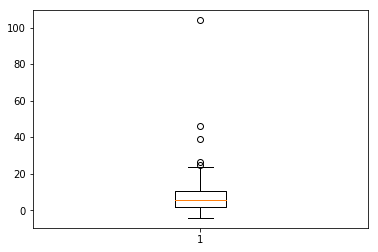

In [10]:
#Outlier detection
plt.boxplot(master_df['inflation'])

{'whiskers': [<matplotlib.lines.Line2D at 0x2744c8f5438>,
 'caps': [<matplotlib.lines.Line2D at 0x2744c8f5ac8>,
 'boxes': [<matplotlib.lines.Line2D at 0x2744c8f5048>],
 'medians': [<matplotlib.lines.Line2D at 0x2744c8f5eb8>],
 'fliers': [<matplotlib.lines.Line2D at 0x2744c8fd4e0>],
 'means': []}

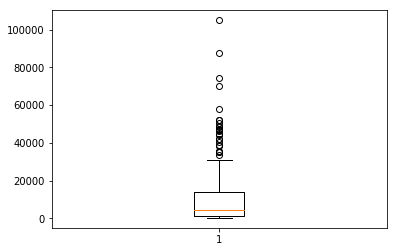

In [11]:
#Outlier detection
plt.boxplot(master_df['gdpp'])

{'whiskers': [<matplotlib.lines.Line2D at 0x2744cb4cda0>,
 'caps': [<matplotlib.lines.Line2D at 0x2744cbd8470>,
 'boxes': [<matplotlib.lines.Line2D at 0x2744cb4c9b0>],
 'medians': [<matplotlib.lines.Line2D at 0x2744cbd8b00>],
 'fliers': [<matplotlib.lines.Line2D at 0x2744cbd8e48>],
 'means': []}

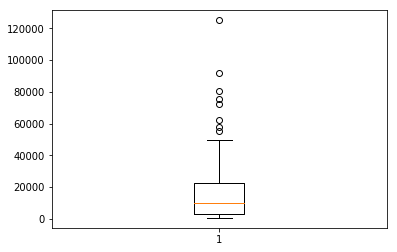

In [12]:
#Outlier detection
plt.boxplot(master_df['income'])

In [13]:
# removing (statistical) outliers if any for income
Q1 = master_df.income.quantile(0.05)
Q3 = master_df.income.quantile(0.95)
IQR = Q3 - Q1
master_df = master_df[(master_df.income >= Q1 - 1.5*IQR) & (master_df.income <= Q3 + 1.5*IQR)]

# outlier treatment for Inflation if any for inflation
Q1 = master_df.inflation.quantile(0.05)
Q3 = master_df.inflation.quantile(0.95)
IQR = Q3 - Q1
grouped_df = master_df[(master_df.inflation >= Q1 - 1.5*IQR) & (master_df.inflation <= Q3 + 1.5*IQR)]

# outlier treatment for GDPP if any for gdpp
Q1 = master_df.gdpp.quantile(0.05)
Q3 = master_df.gdpp.quantile(0.95)
IQR = Q3 - Q1
master_df = master_df[(master_df.gdpp >= Q1 - 1.5*IQR) & (master_df.gdpp <= Q3 + 1.5*IQR)]


In [14]:
## After outlier treatment, again checking the dataset
# Checking outliers at 25%,50%,75%,90%,95% and 99%
master_df.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,child_mort,income,inflation,life_expec,total_fer,gdpp,export_value,health_value,imports_value
count,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,1.660000e+02,166.000000,1.660000e+02
mean,38.446386,16494.957831,7.786663,70.501807,2.953253,12618.759036,7.201485e+05,105543.382590,6.527249e+05
std,40.386337,17406.031926,10.602503,8.892697,1.516880,17830.697578,1.780311e+06,180678.097496,1.473405e+06
min,2.600000,609.000000,-4.210000,32.100000,1.150000,231.000000,1.076920e+02,1282.120000,6.510920e+01
25%,8.075000,3347.500000,1.790000,65.300000,1.792500,1320.000000,4.436700e+04,7771.425000,6.207525e+04
50%,19.500000,9950.000000,5.265000,73.100000,2.410000,4635.000000,1.775220e+05,31406.800000,2.020150e+05
75%,62.150000,22600.000000,10.825000,76.775000,3.895000,13500.000000,6.714375e+05,95516.250000,7.531850e+05
90%,100.350000,41100.000000,16.650000,80.400000,5.325000,41200.000000,1.657150e+06,384428.000000,1.470630e+06
95%,116.000000,45650.000000,20.875000,81.400000,5.862500,48150.000000,2.876625e+06,497512.250000,2.437180e+06
99%,153.500000,77090.000000,41.545000,82.375000,6.564000,79220.000000,6.522465e+06,841288.600000,5.576097e+06


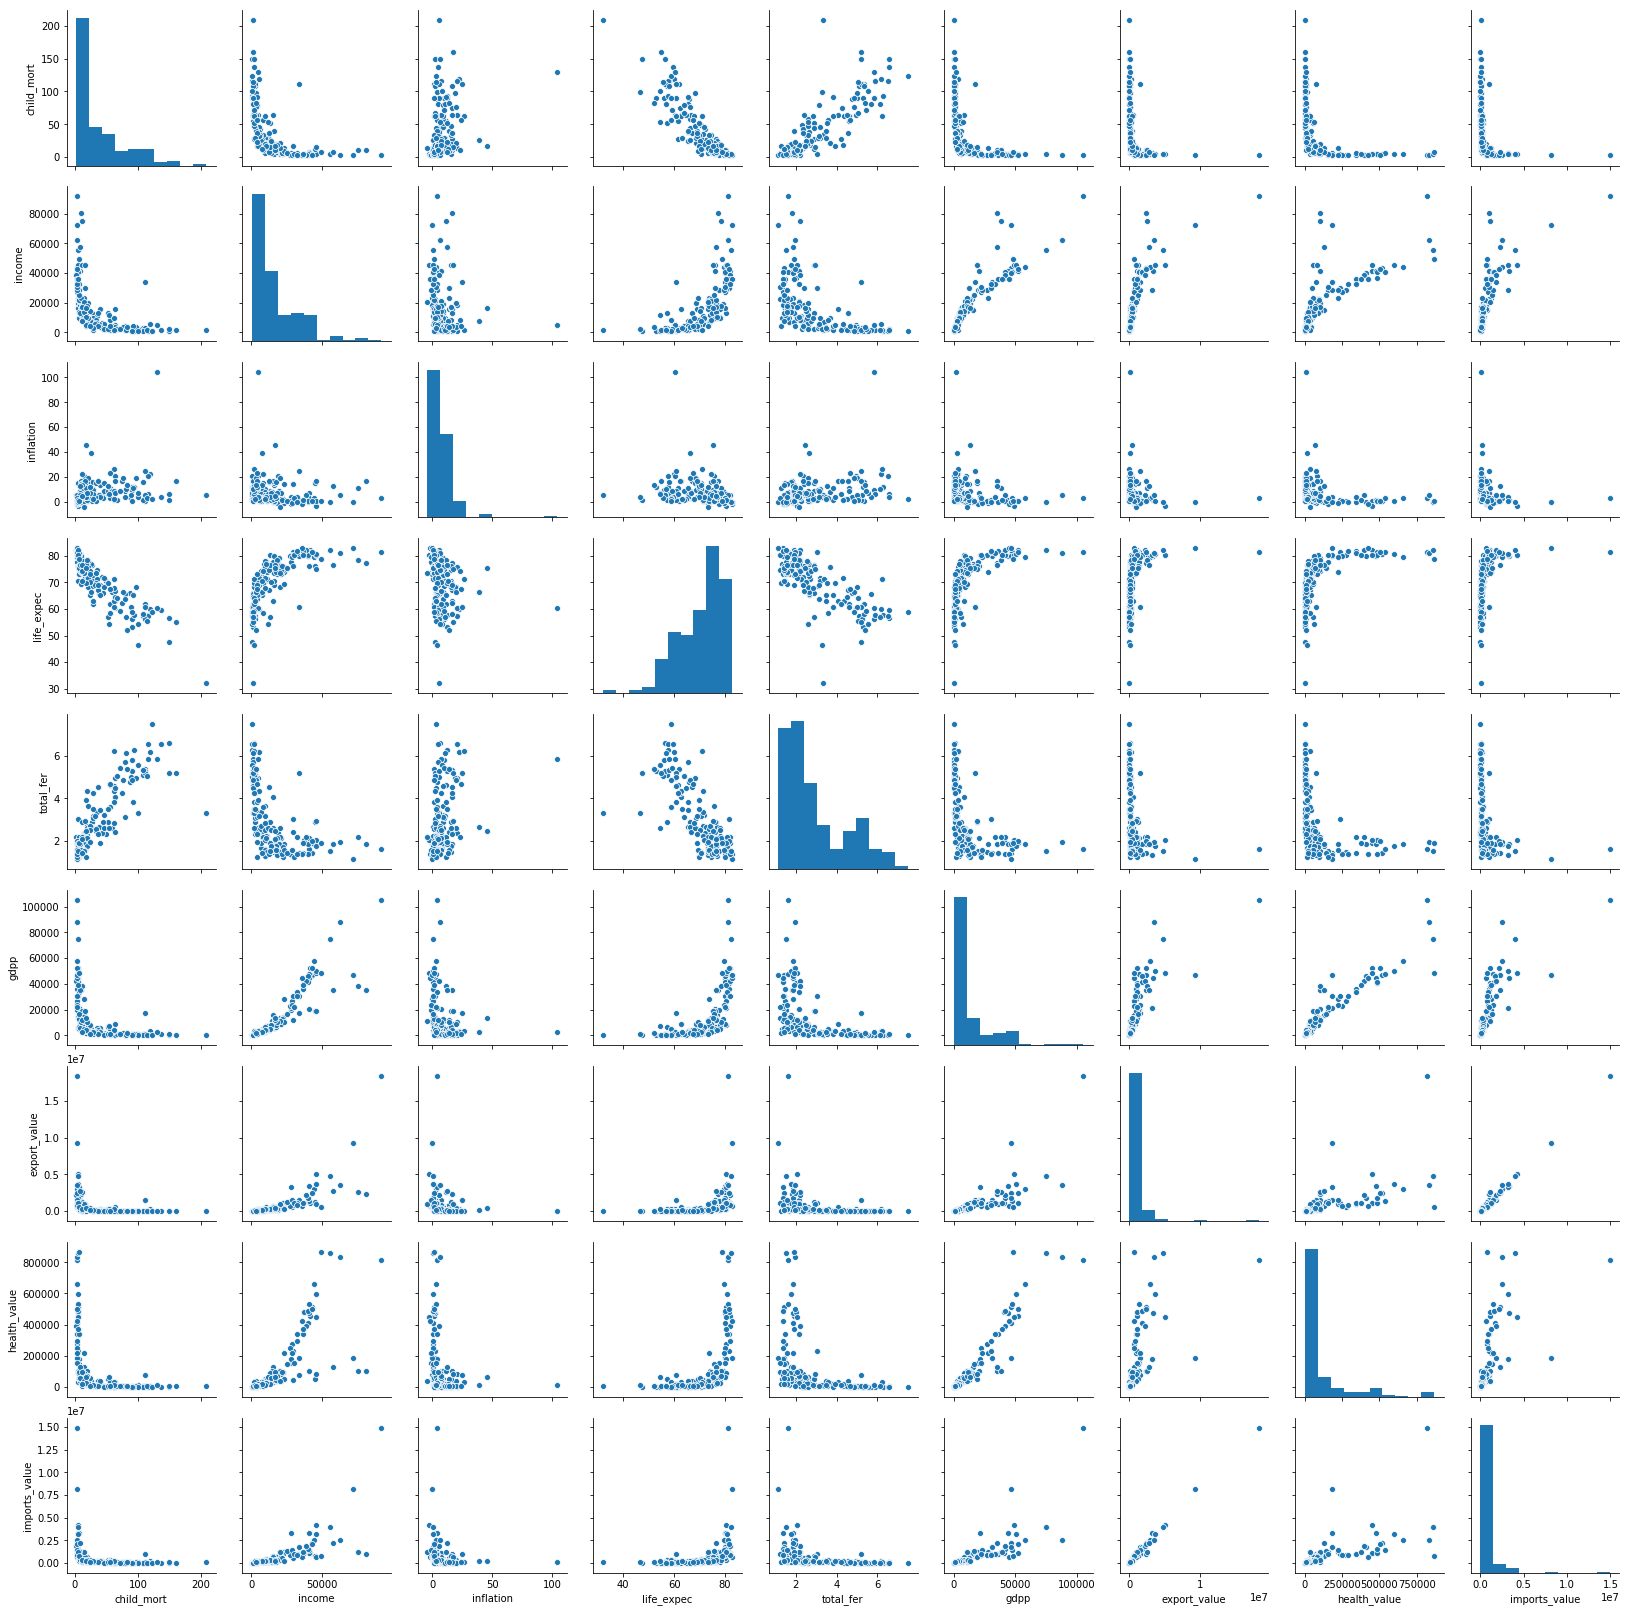

In [15]:
# Looks like only 1 entry got removed from dataset after outlier analysis
# Plotting interactions of variables among themselves
sns.pairplot(master_df)

##### There are alot of observations that can be deduced from above plots. But highlighting a few of them:
##### Higher the GDPP, lower is the child_mort rate
##### Higher the child_mort rate, higher the total_fer rate
##### Lower is the child_mort rate, higher is the life expectancy
##### Higher is the income, lower is the child_mort rate
##### Lets find out the correlations between various columns now

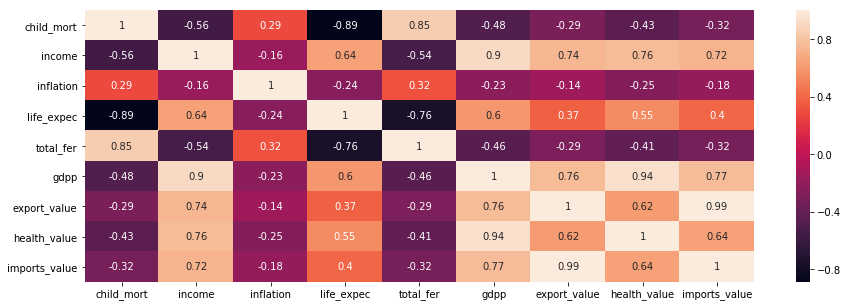

In [16]:
# Let's see the correlation matrix 
plt.figure(figsize = (15,5))        # Size of the figure
sns.heatmap(master_df.corr(),annot = True)

## 3. Prepare the data for modelling

In [17]:
## There are strong correlations between various variables. So, instead of using RFE to get a non-correlated dataset,
## we would use PCA. PCA would also reduce the number of columns in the dataset.
original_df=master_df.copy()
countries=master_df.pop("country")
master_df.head()

,child_mort,income,inflation,life_expec,total_fer,gdpp,export_value,health_value,imports_value
0,90.2,1610.0,9.44,56.2,5.82,553.0,5530.0,4191.74,24829.7
1,16.6,9930.0,4.49,76.3,1.65,4090.0,114520.0,26789.50,198774.0
2,27.3,12900.0,16.10,76.5,2.89,4460.0,171264.0,18598.20,140044.0
3,119.0,5900.0,22.40,60.1,6.16,3530.0,219919.0,10060.50,151437.0
4,10.3,19100.0,1.44,76.8,2.13,12200.0,555100.0,73566.00,718580.0


In [18]:
## Scaling the data, as PCA is sensitive to the variance in the columns.
from sklearn.preprocessing import StandardScaler

# Initiating the Standard Scaler
scaler = StandardScaler()

# fit_transform
master_df_scaled = scaler.fit_transform(master_df)
master_df_scaled.shape

(166, 9)

In [19]:
# Visualising the dataset
master_df_scaled=pd.DataFrame(master_df_scaled)
master_df_scaled.columns = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 
                            'life_expec', 'total_fer', 'gdpp']
master_df_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.285341,-0.857748,0.156410,-1.613131,1.895616,-0.678732,-0.402616,-0.562649,-0.427442
1,-0.542572,-0.378307,-0.311873,0.653990,-0.861767,-0.479766,-0.341211,-0.437198,-0.309029
2,-0.276829,-0.207160,0.786464,0.676549,-0.041826,-0.458953,-0.309241,-0.482672,-0.349009
3,2.000611,-0.610536,1.382462,-1.173241,2.120438,-0.511268,-0.281829,-0.530069,-0.341254
4,-0.699037,0.150116,-0.600412,0.710386,-0.544370,-0.023556,-0.092988,-0.177521,0.044831


## 4. Modelling

##### Hopkins Statistics: It is a statistic which indicates how well data can be clustered

In [20]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    n = len(X) # rows of the dataset
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [21]:
# Calculating Hopkins Statistic for master dataset. Will perform for PCA dataset too
hopkins(master_df_scaled)

0.9179863349359402

### PCA

In [22]:
# Since Hopkins statistic value is 0.91, so it has high tendency to cluster.
# Applying PCA
from sklearn.decomposition import PCA
pca = PCA(random_state=42)
pca.fit(master_df_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='auto', tol=0.0, whiten=False)

In [23]:
pca.components_

array([[-0.31329158,  0.39100314, -0.1421768 ,  0.34043208, -0.30039949,
         0.39806824,  0.33871997,  0.36155342,  0.34453797],
       [ 0.47719847,  0.11592526,  0.21693454, -0.37235977,  0.45929958,
         0.19653981,  0.39753622,  0.16066849,  0.37376082],
       [-0.14778835,  0.13220783,  0.95294637,  0.19576233, -0.07603414,
         0.00357271, -0.02908358, -0.06221171, -0.0611549 ],
       [-0.14912623, -0.1369584 , -0.01309242, -0.01595635, -0.21274214,
        -0.36314077,  0.45563715, -0.60696015,  0.45325652],
       [ 0.21911417,  0.19172187,  0.06954583, -0.6061168 , -0.72748401,
         0.05674958, -0.05531265,  0.03913476, -0.07728511],
       [ 0.06724971,  0.80919616, -0.13790072,  0.02539264,  0.20159635,
         0.01430229, -0.06686103, -0.4819076 , -0.20848665],
       [ 0.75990398, -0.04146539, -0.01980951,  0.58136441, -0.27692336,
        -0.04110784, -0.00965452, -0.05576735,  0.02949517],
       [ 0.00553377,  0.31591351, -0.0026092 ,  0.01125301,  0

In [24]:
# Checking how much variance is explained by individual variables
pca.explained_variance_ratio_

array([5.97644925e-01, 1.85275556e-01, 9.88765696e-02, 6.15840617e-02,
       2.49180218e-02, 2.02791408e-02, 9.42652733e-03, 1.55313675e-03,
       4.42061637e-04])

<BarContainer object of 9 artists>

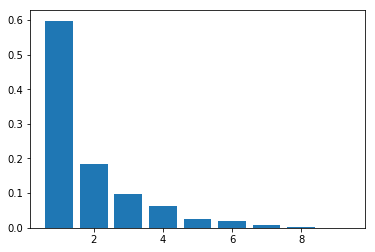

In [25]:
# Visually checking the variance explained by the variables
plt.bar(range(1,len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)

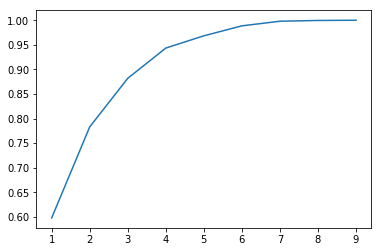

In [26]:
## Making the scree plot for choosing the right number of PCA components
var_cumu = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(1,len(var_cumu)+1), var_cumu)

In [27]:
# Choosing PCA with 5 components as it explains around 95% of the variance
pc2 = PCA(n_components=5, random_state=42)

In [28]:
PCA_data = pc2.fit_transform(master_df_scaled)
PCA_data.shape

(166, 5)

In [29]:
PCA_data_df = pd.DataFrame(PCA_data, columns=["PC1", "PC2", "PC3", "PC4", "PC5"])
PCA_data_df.head()

,PC1,PC2,PC3,PC4,PC5
0,-2.636163,1.475566,-0.543802,-0.242994,-0.278452
1,-0.023179,-1.425438,-0.019170,0.453753,0.015843
2,-0.445405,-0.677769,0.957331,0.217995,-0.426175
3,-2.706641,2.169366,0.610341,-0.440906,-0.421806
4,0.678818,-1.014337,-0.257624,0.290275,-0.207306


In [30]:
# Calculating Hopkins Statistic for PCA dataset.
hopkins(PCA_data_df)

0.9401947754888184

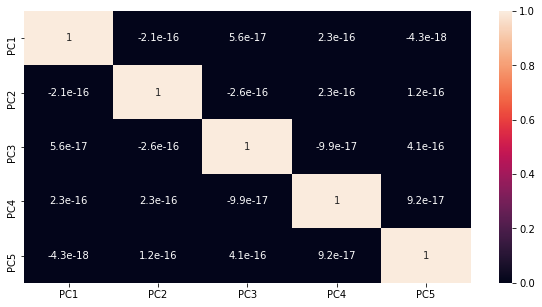

In [31]:
# Hopkins statistics shows data has high tendency to cluster.
# Let's see the correlation matrix 
plt.figure(figsize = (10,5))        # Size of the figure
sns.heatmap(PCA_data_df.corr(),annot = True)

In [32]:
## As shown in correlations matrix, there is no correlations between different columns. So, we dont have to perform 
## RFE, as PCA has done the same job for us.
PCA_data_df_with_country = pd.concat([PCA_data_df, countries], axis=1)
PCA_data_df_with_country.head()

,PC1,PC2,PC3,PC4,PC5,country
0,-2.636163,1.475566,-0.543802,-0.242994,-0.278452,Afghanistan
1,-0.023179,-1.425438,-0.019170,0.453753,0.015843,Albania
2,-0.445405,-0.677769,0.957331,0.217995,-0.426175,Algeria
3,-2.706641,2.169366,0.610341,-0.440906,-0.421806,Angola
4,0.678818,-1.014337,-0.257624,0.290275,-0.207306,Antigua and Barbuda


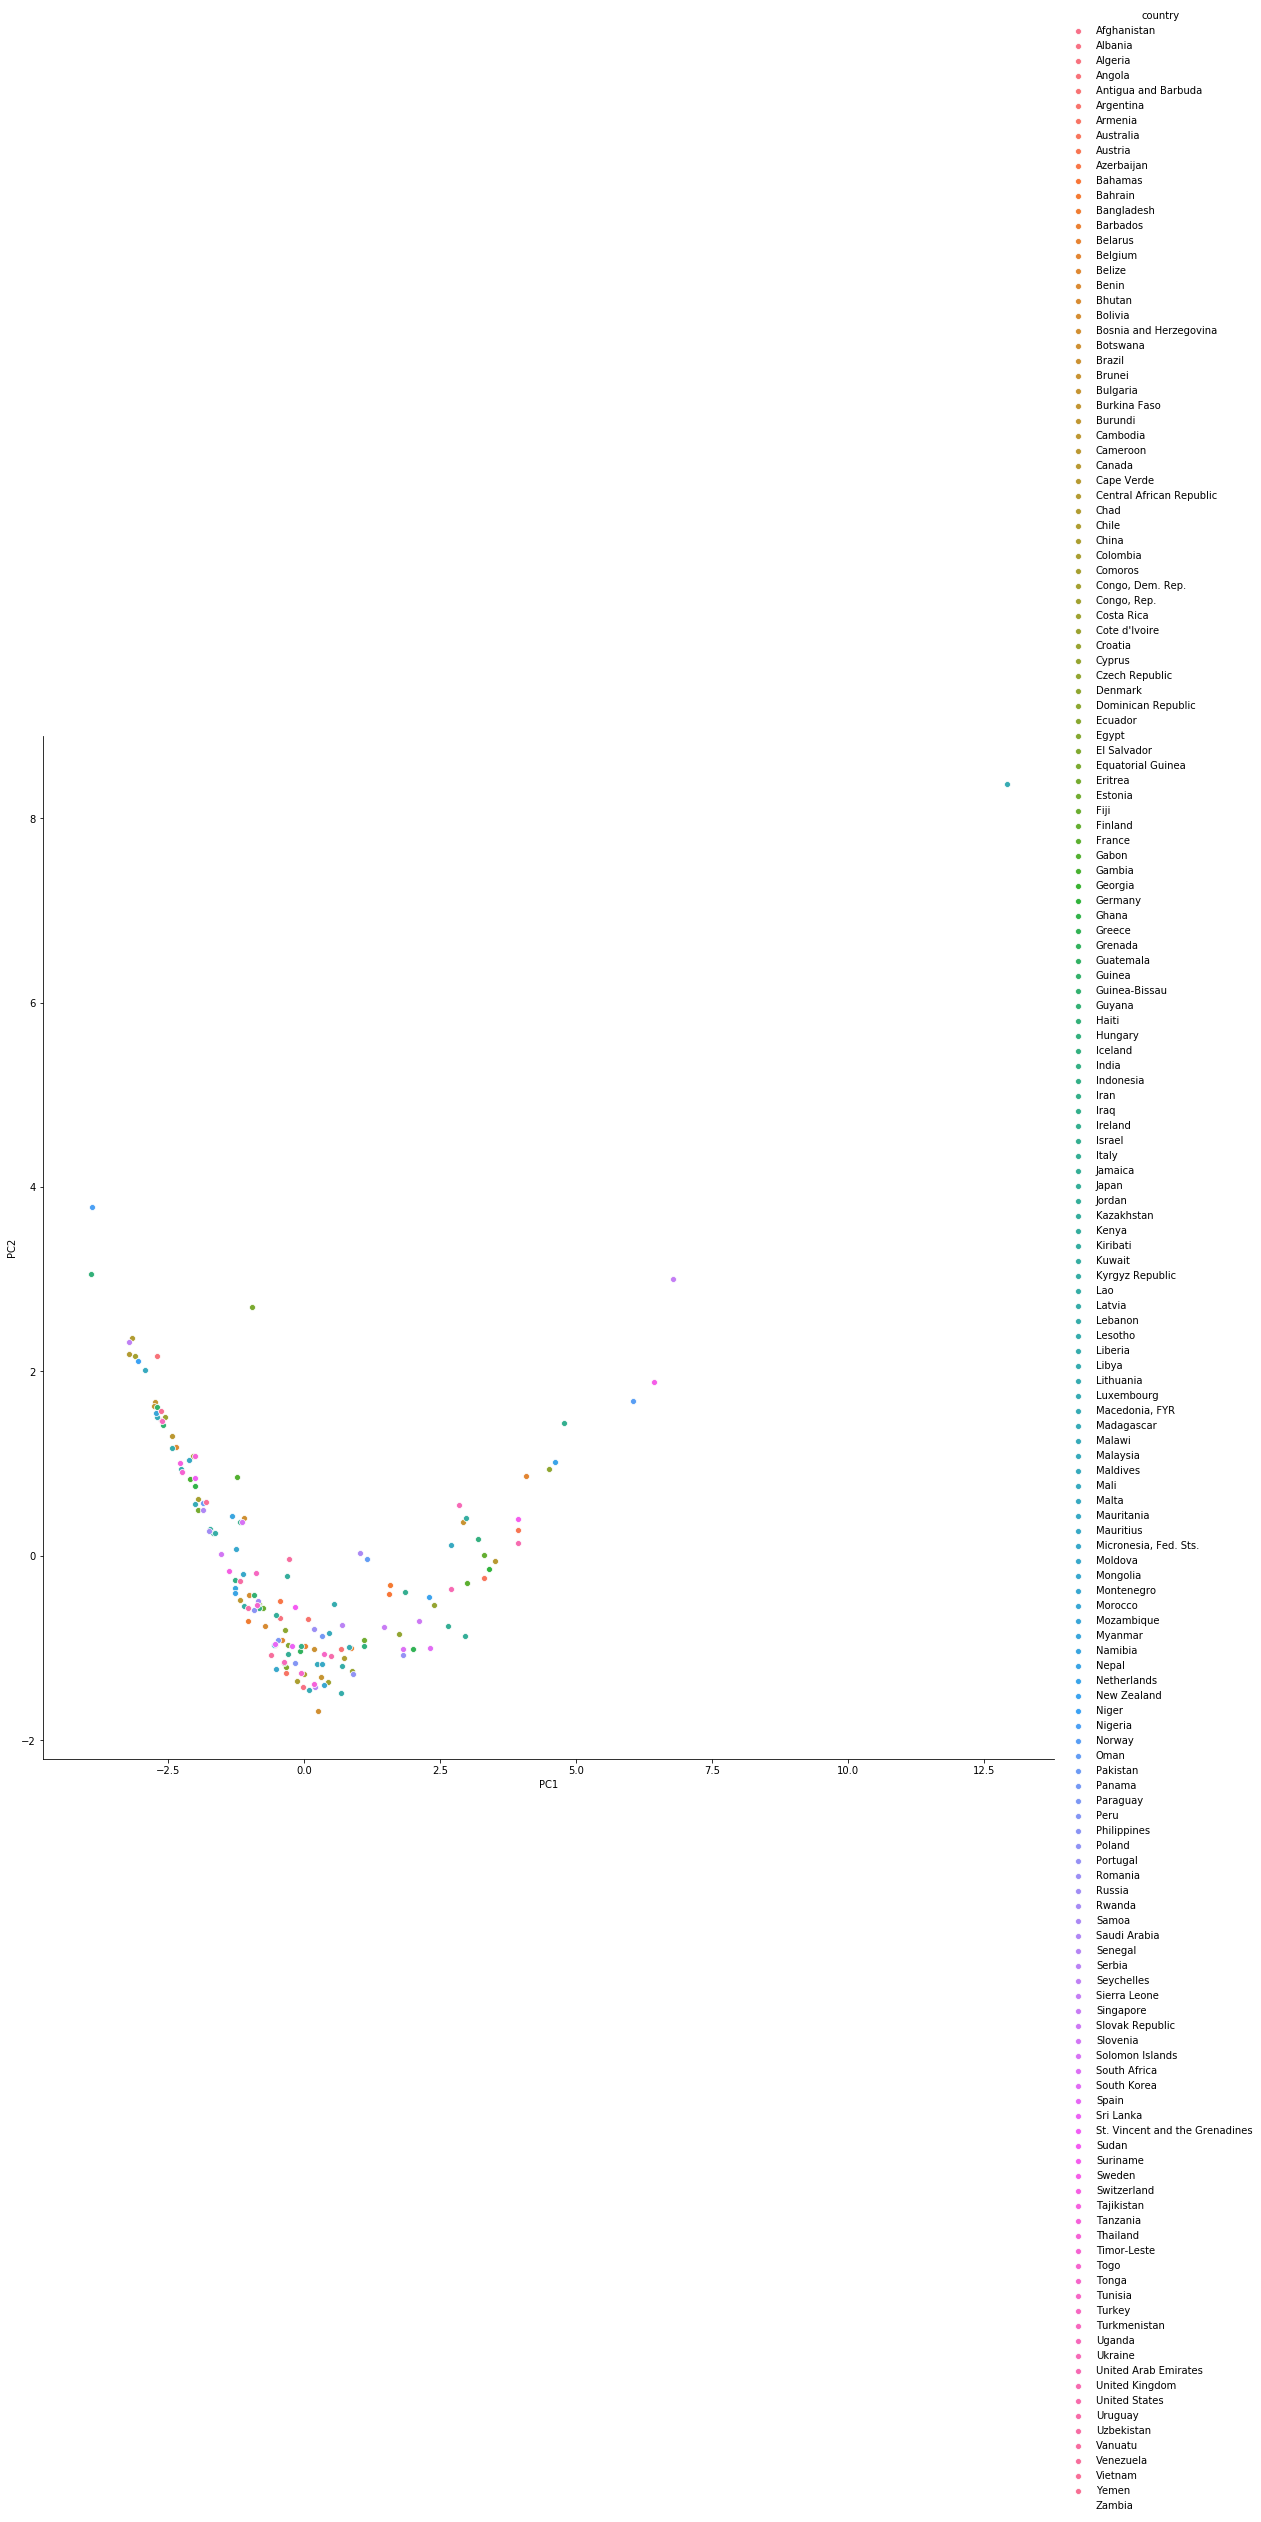

In [33]:
# Lets visualize the position of countries based on PC1 and PC2 variable(s)
sns.pairplot(data=PCA_data_df_with_country, x_vars=["PC1"], y_vars=["PC2"], hue = "country", height=15)

### KMeans

In [74]:
## Lets start KMeans clustering with any random value
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, max_iter=200, random_state=40)
kmeans.fit(PCA_data_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=200,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=40, tol=0.0001, verbose=0)

In [75]:
kmeans.labels_

array([2, 0, 0, 2, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 2,
       0, 1, 0, 2, 2, 0, 2, 1, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 1, 0,
       1, 0, 0, 0, 0, 2, 2, 0, 0, 1, 1, 2, 2, 0, 1, 2, 0, 0, 0, 2, 2, 0,
       2, 0, 1, 0, 0, 0, 2, 1, 0, 1, 0, 1, 0, 0, 2, 2, 1, 0, 2, 0, 0, 2,
       2, 0, 0, 1, 0, 2, 2, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0,
       1, 1, 2, 2, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 2,
       1, 0, 0, 2, 2, 0, 1, 0, 0, 2, 0, 1, 1, 0, 2, 0, 2, 2, 0, 0, 0, 0,
       2, 0, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2])

### Finding the Optimal Number of Clusters

#### SSD

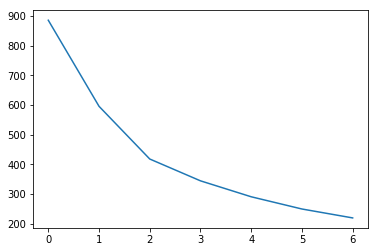

In [36]:
# elbow-curve/SSD
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=200, random_state=40)
    kmeans.fit(PCA_data_df)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
# ssd
plt.plot(ssd)

#### Silhouette Analysis

In [37]:
# silhouette analysis
from sklearn.metrics import silhouette_score
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialising kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=200, random_state=40)
    kmeans.fit(PCA_data_df)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(PCA_data_df, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    
    

For n_clusters=2, the silhouette score is 0.47482003337599865
For n_clusters=3, the silhouette score is 0.4436018324365352
For n_clusters=4, the silhouette score is 0.451118520415574
For n_clusters=5, the silhouette score is 0.4539097599207455
For n_clusters=6, the silhouette score is 0.32720413471339455
For n_clusters=7, the silhouette score is 0.3166103713095467
For n_clusters=8, the silhouette score is 0.3242923130683561


In [38]:
# final model with k=4 by analysing Elbow curve, silhouette score, and taking into consideration that we need to
# segregate countries which need dire aid.
kmeans = KMeans(n_clusters=4, max_iter=200, random_state=40)
kmeans.fit(PCA_data_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=200,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=40, tol=0.0001, verbose=0)

In [39]:
kmeans.labels_

array([0, 3, 3, 0, 3, 3, 3, 1, 1, 3, 3, 3, 3, 3, 3, 1, 3, 0, 3, 3, 3, 0,
       3, 1, 3, 0, 0, 3, 0, 1, 3, 0, 0, 3, 3, 3, 0, 0, 0, 3, 0, 3, 1, 3,
       1, 3, 3, 3, 3, 0, 0, 3, 3, 1, 1, 0, 0, 3, 1, 0, 1, 3, 3, 0, 0, 3,
       0, 3, 1, 3, 3, 3, 0, 1, 1, 1, 3, 1, 3, 3, 0, 0, 1, 3, 0, 3, 3, 0,
       0, 3, 3, 2, 3, 0, 0, 3, 3, 0, 1, 0, 3, 3, 3, 3, 3, 3, 0, 3, 0, 3,
       1, 1, 0, 0, 1, 3, 0, 3, 3, 3, 3, 3, 1, 3, 3, 0, 3, 3, 0, 3, 3, 0,
       2, 3, 1, 0, 0, 3, 1, 3, 3, 0, 3, 1, 1, 3, 0, 3, 0, 0, 3, 3, 3, 3,
       0, 3, 1, 1, 1, 3, 3, 3, 3, 3, 0, 0])

In [40]:
original_df['PCA_cluster_id'] = kmeans.labels_
original_df.head()

,country,child_mort,income,inflation,life_expec,total_fer,gdpp,export_value,health_value,imports_value,PCA_cluster_id
0,Afghanistan,90.2,1610.0,9.44,56.2,5.82,553.0,5530.0,4191.74,24829.7,0
1,Albania,16.6,9930.0,4.49,76.3,1.65,4090.0,114520.0,26789.50,198774.0,3
2,Algeria,27.3,12900.0,16.10,76.5,2.89,4460.0,171264.0,18598.20,140044.0,3
3,Angola,119.0,5900.0,22.40,60.1,6.16,3530.0,219919.0,10060.50,151437.0,0
4,Antigua and Barbuda,10.3,19100.0,1.44,76.8,2.13,12200.0,555100.0,73566.00,718580.0,3


In [41]:
## Checking how many countries are in each cluster
original_df['PCA_cluster_id'].value_counts()

3    87
0    48
1    29
2     2
Name: PCA_cluster_id, dtype: int64

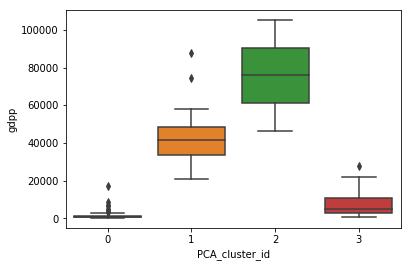

In [42]:
# Plotting Cluster ID(s) with respect to GDPP variable
sns.boxplot(x='PCA_cluster_id', y='gdpp', data=original_df)

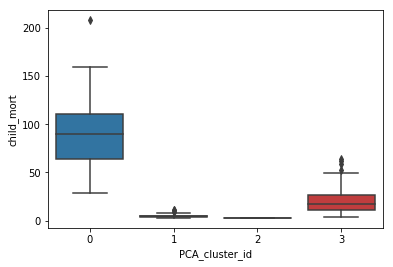

In [43]:
# Based on above plot, Cluster 0 has lowest GDPP as compared to other clusters
# Plotting Cluster ID(s) with respect to child_mort variable
sns.boxplot(x='PCA_cluster_id', y='child_mort', data=original_df)

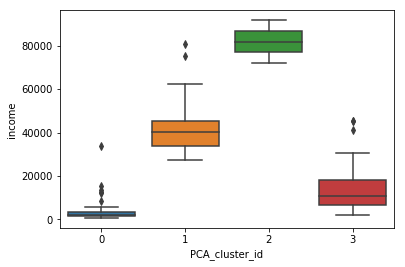

In [44]:
# Based on above plot, Cluster 0 has highest child_mort as compared to other clusters
# Plotting Cluster ID(s) with respect to income variable
sns.boxplot(x='PCA_cluster_id', y='income', data=original_df)

In [45]:
# Based on above plot, Cluster 0 countries have the lowest income across all clusters.

### Hierarchical Clustering

In [46]:
PCA_data_df.head()

,PC1,PC2,PC3,PC4,PC5
0,-2.636163,1.475566,-0.543802,-0.242994,-0.278452
1,-0.023179,-1.425438,-0.019170,0.453753,0.015843
2,-0.445405,-0.677769,0.957331,0.217995,-0.426175
3,-2.706641,2.169366,0.610341,-0.440906,-0.421806
4,0.678818,-1.014337,-0.257624,0.290275,-0.207306


In [47]:
original_df.head()

,country,child_mort,income,inflation,life_expec,total_fer,gdpp,export_value,health_value,imports_value,PCA_cluster_id
0,Afghanistan,90.2,1610.0,9.44,56.2,5.82,553.0,5530.0,4191.74,24829.7,0
1,Albania,16.6,9930.0,4.49,76.3,1.65,4090.0,114520.0,26789.50,198774.0,3
2,Algeria,27.3,12900.0,16.10,76.5,2.89,4460.0,171264.0,18598.20,140044.0,3
3,Angola,119.0,5900.0,22.40,60.1,6.16,3530.0,219919.0,10060.50,151437.0,0
4,Antigua and Barbuda,10.3,19100.0,1.44,76.8,2.13,12200.0,555100.0,73566.00,718580.0,3


In [48]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

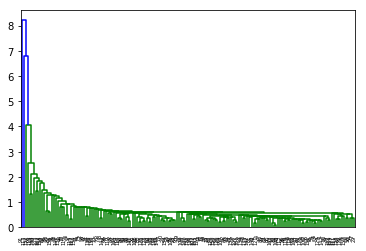

In [49]:
# single linkage
mergings = linkage(PCA_data_df, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

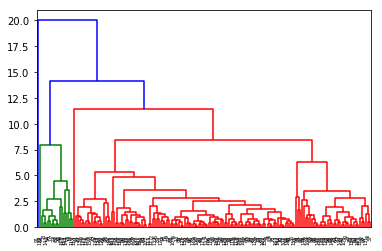

In [50]:
# complete linkage
mergings = linkage(PCA_data_df, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [51]:
# choosing 4 clusters
cluster_labels = cut_tree(mergings, n_clusters=4).reshape(-1, )
cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

## 5. Final analysis

In [52]:
# assign cluster labels
original_df['Hierarchical_cluster_labels'] = cluster_labels
original_df.head()

,country,child_mort,income,inflation,life_expec,total_fer,gdpp,export_value,health_value,imports_value,PCA_cluster_id,Hierarchical_cluster_labels
0,Afghanistan,90.2,1610.0,9.44,56.2,5.82,553.0,5530.0,4191.74,24829.7,0,0
1,Albania,16.6,9930.0,4.49,76.3,1.65,4090.0,114520.0,26789.50,198774.0,3,0
2,Algeria,27.3,12900.0,16.10,76.5,2.89,4460.0,171264.0,18598.20,140044.0,3,0
3,Angola,119.0,5900.0,22.40,60.1,6.16,3530.0,219919.0,10060.50,151437.0,0,0
4,Antigua and Barbuda,10.3,19100.0,1.44,76.8,2.13,12200.0,555100.0,73566.00,718580.0,3,0


In [53]:
## Checking how many countries are in each cluster
original_df['Hierarchical_cluster_labels'].value_counts()

0    147
1     17
3      1
2      1
Name: Hierarchical_cluster_labels, dtype: int64

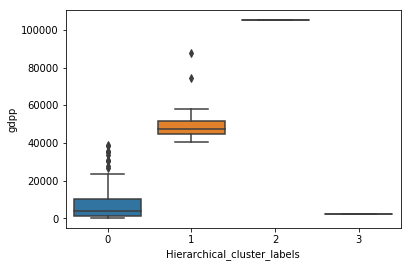

In [54]:
sns.boxplot(x='Hierarchical_cluster_labels', y='gdpp', data=original_df)

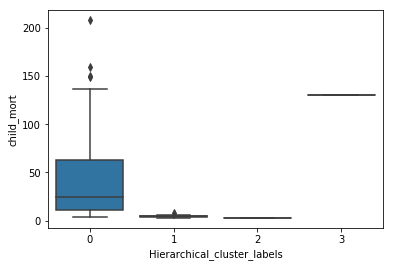

In [55]:
# Based on above plot, Cluster 0, cluster 3 countries have the lowest gdpp across all clusters.
sns.boxplot(x='Hierarchical_cluster_labels', y='child_mort', data=original_df)

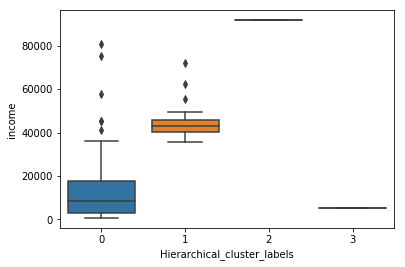

In [56]:
# Based on above plot, Cluster 0 and cluster 3 countries have the highest child_mort across all clusters.
sns.boxplot(x='Hierarchical_cluster_labels', y='income', data=original_df)

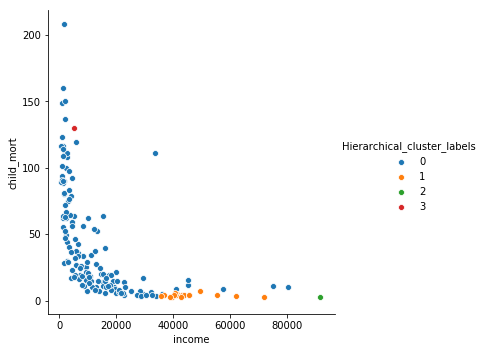

In [57]:
# Based on above plot, Cluster 0, cluster 3 countries have the lowest income across all clusters.
# Now, lets visualize the dataset based on certain dataset variable(s) and hierarchical cluster
sns.pairplot(data=original_df, x_vars=["income"], y_vars=["child_mort"], hue = "Hierarchical_cluster_labels", height=5)

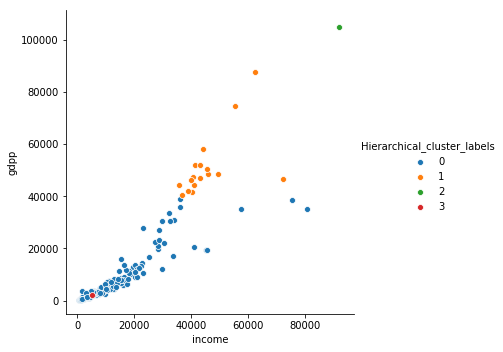

In [58]:
# Lets visualize the dataset based on certain dataset variable(s) and hierarchical cluster
sns.pairplot(data=original_df, x_vars=["income"], y_vars=["gdpp"], hue = "Hierarchical_cluster_labels", height=5)

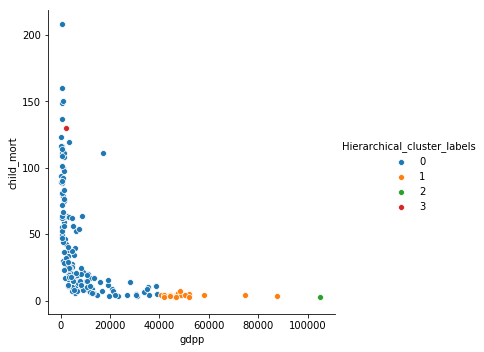

In [59]:
# Lets visualize the dataset based on certain dataset variable(s) and hierarchical cluster
sns.pairplot(data=original_df, x_vars=["gdpp"], y_vars=["child_mort"], hue = "Hierarchical_cluster_labels", height=5)

##### Classification by Hierarchical clustering is not good.
##### Lets visualise KMeans clustering

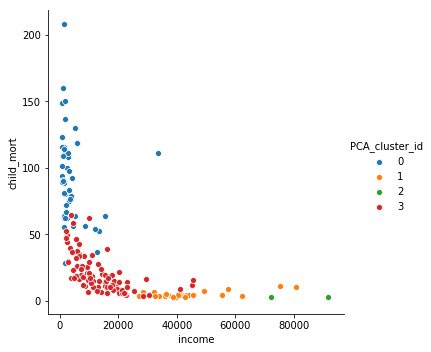

In [60]:
# Lets visualize the dataset based on certain dataset variable(s) and KMeans cluster
sns.pairplot(data=original_df, x_vars=["income"], y_vars=["child_mort"], hue = "PCA_cluster_id", height=5)

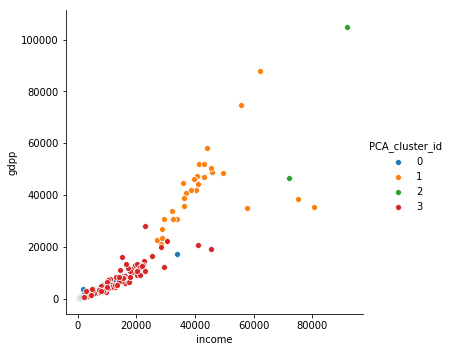

In [61]:
# Lets visualize the dataset based on certain dataset variable(s) and KMeans cluster
sns.pairplot(data=original_df, x_vars=["income"], y_vars=["gdpp"], hue = "PCA_cluster_id", height=5)

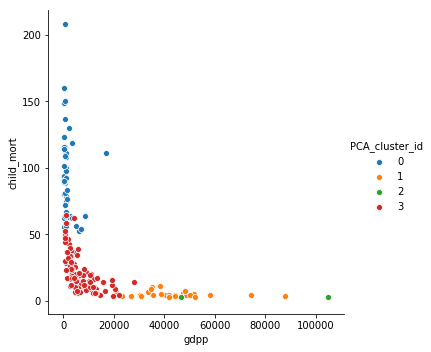

In [62]:
# Lets visualize the dataset based on certain dataset variable(s) and KMeans cluster
sns.pairplot(data=original_df, x_vars=["gdpp"], y_vars=["child_mort"], hue = "PCA_cluster_id", height=5)

In [63]:
# Lets append PCA clustering variables, and Heirarchical clustering variables in PCA Dataset, and see the graphs
PCA_data_df_clustered=PCA_data_df.copy()
PCA_data_df_clustered['PCA_cluster_id'] = kmeans.labels_
PCA_data_df_clustered['Hierarchical_cluster_labels'] = cluster_labels
PCA_data_df_clustered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166 entries, 0 to 165
Data columns (total 7 columns):
PC1                            166 non-null float64
PC2                            166 non-null float64
PC3                            166 non-null float64
PC4                            166 non-null float64
PC5                            166 non-null float64
PCA_cluster_id                 166 non-null int32
Hierarchical_cluster_labels    166 non-null int32
dtypes: float64(5), int32(2)
memory usage: 7.9 KB


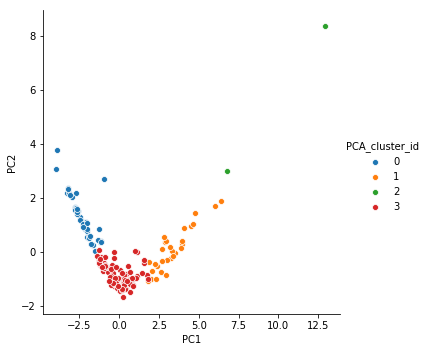

In [64]:
# Lets visualize the dataset based on PC1 and PC2 variable(s), and PCA Cluster ID(s)
sns.pairplot(data=PCA_data_df_clustered, x_vars=["PC1"], y_vars=["PC2"], hue = "PCA_cluster_id", height=5)

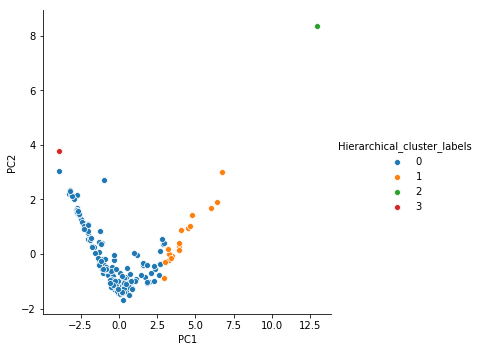

In [65]:
# Lets visualize the dataset based on PC1 and PC2 variable(s)
sns.pairplot(data=PCA_data_df_clustered, x_vars=["PC1"], y_vars=["PC2"], hue = "Hierarchical_cluster_labels", height=5)

In [72]:
## We have plotted plots for hierarchical clusters, PCA clusters, and between PC1, PC2, and KMeans+Hierarchical clusters
## Since KMeans clusters are more segregated, we have chosen KMeans clustering for our analysis.
## In KMeans clustering, we have chosen cluster 0 which is in need of dire aid because that cluster has lowest GDPP,
## lowest income and highest child_mort as compared to other clusters
## Finding out which countries belong to Cluster 0
## Cluster 0 countries seems to be underdeveloped/poor countries
dire_need_countries_df = original_df.loc[original_df['PCA_cluster_id'] == 0].copy()
dire_need_countries_df.sort_values(["child_mort", "income", "gdpp"], axis=0, 
                 ascending=[False,True,True], inplace=True)
dire_need_countries_df.head(100)

,country,child_mort,income,inflation,life_expec,total_fer,gdpp,export_value,health_value,imports_value,PCA_cluster_id,Hierarchical_cluster_labels
66,Haiti,208.0,1500.0,5.450,32.1,3.33,662.0,10128.60,4574.42,42831.4,0,0
132,Sierra Leone,160.0,1220.0,17.200,55.0,5.20,399.0,6703.20,5226.90,13765.5,0,0
32,Chad,150.0,1930.0,6.390,56.5,6.59,897.0,33009.60,4063.41,39019.5,0,0
31,Central African Republic,149.0,888.0,2.010,47.5,5.21,446.0,5262.80,1775.08,11819.0,0,0
97,Mali,137.0,1870.0,4.370,59.5,6.55,708.0,16142.40,3525.84,24850.8,0,0
113,Nigeria,130.0,5150.0,104.000,60.5,5.84,2330.0,58949.00,11813.10,40542.0,0,3
112,Niger,123.0,814.0,2.550,58.8,7.49,348.0,7725.60,1795.68,17086.8,0,0
3,Angola,119.0,5900.0,22.400,60.1,6.16,3530.0,219919.00,10060.50,151437.0,0,0
37,"Congo, Dem. Rep.",116.0,609.0,20.800,57.5,6.54,334.0,13727.40,2641.94,16566.4,0,0
25,Burkina Faso,116.0,1430.0,6.810,57.9,5.87,575.0,11040.00,3875.50,17020.0,0,0


In [67]:
## Based on Child_mort, GDPP, and income creteria, we would like to report back all above countries which are in need of aid
## But following 17 countries are in need to direst aid as Child_mort > 100 present in cluster 0
## 1) Haiti
## 2) Sierra Leone
## 3) Chad
## 4) Central African Republic
## 5) Mali
## 6) Nigeria
## 7) Niger
## 8) Angola
## 9) Congo, Dem. Rep.
## 10) Burkina Faso
## 11) Guinea-Bissau
## 12) Benin
## 13) Cote d'Ivoire
## 14) Equatorial Guinea
## 15) Guinea
## 16) Cameroon
## 17) Mozambique

In [73]:
## Checking countries in other clusters so that we can analyze how clusters were made
## Checking countries in Cluster 0
original_df.loc[original_df['PCA_cluster_id'] == 1].sort_values(["child_mort", "income", "gdpp"], axis=0, 
                 ascending=[False,True,True]).head(100)

,country,child_mort,income,inflation,life_expec,total_fer,gdpp,export_value,health_value,imports_value,PCA_cluster_id,Hierarchical_cluster_labels
82,Kuwait,10.8,75200.0,11.200,78.2,2.21,38500.0,2567950.0,101255.0,1170400.0,1,0
23,Brunei,10.5,80600.0,16.700,77.1,1.84,35300.0,2379220.0,100252.0,988400.0,1,0
157,United Arab Emirates,8.6,57600.0,12.500,76.5,1.87,35000.0,2719500.0,128100.0,2226000.0,1,0
159,United States,7.3,49400.0,1.220,78.7,1.93,48400.0,600160.0,866360.0,764720.0,1,1
98,Malta,6.8,28300.0,3.830,80.3,1.36,21100.0,3228300.0,182515.0,3249400.0,1,0
111,New Zealand,6.2,32300.0,3.730,80.9,2.17,33700.0,1021110.0,340370.0,943600.0,1,0
29,Canada,5.6,40700.0,2.870,81.3,1.63,47400.0,1379340.0,535620.0,1469400.0,1,1
158,United Kingdom,5.2,36200.0,1.570,80.3,1.92,38900.0,1096980.0,374996.0,1198120.0,1,0
7,Australia,4.8,41400.0,1.160,82.0,1.93,51900.0,1027620.0,453087.0,1084710.0,1,1
74,Israel,4.6,29600.0,1.770,81.4,3.03,30600.0,1071000.0,233478.0,1006740.0,1,0


In [69]:
## Checking countries in Cluster 2
original_df.loc[original_df['PCA_cluster_id'] == 2].sort_values(["child_mort", "income", "gdpp"], axis=0, 
                 ascending=[False,True,True]).head(100)

,country,child_mort,income,inflation,life_expec,total_fer,gdpp,export_value,health_value,imports_value,PCA_cluster_id,Hierarchical_cluster_labels
133,Singapore,2.8,72100.0,-0.046,82.7,1.15,46600.0,9320000.0,184536.0,8108400.0,2,1
91,Luxembourg,2.8,91700.0,3.620,81.3,1.63,105000.0,18375000.0,815850.0,14910000.0,2,2


In [70]:
## Checking countries in Cluster 3
original_df.loc[original_df['PCA_cluster_id'] == 3].sort_values(["child_mort", "income", "gdpp"], axis=0, 
                 ascending=[False,True,True]).head(100)

,country,child_mort,income,inflation,life_expec,total_fer,gdpp,export_value,health_value,imports_value,PCA_cluster_id,Hierarchical_cluster_labels
107,Myanmar,64.4,3720.0,7.040,66.8,2.41,988.0,107.692,1946.36,6.510920e+01,3,0
154,Turkmenistan,62.0,9940.0,2.310,67.9,2.83,4440.0,338772.000,11100.00,1.975800e+05,3,0
69,India,58.8,4410.0,8.980,66.2,2.60,1350.0,30510.000,5467.50,3.658500e+04,3,0
146,Tajikistan,52.4,2110.0,12.500,69.6,3.51,738.0,10996.200,4413.24,4.324680e+04,3,0
12,Bangladesh,49.4,2440.0,7.140,70.4,2.33,758.0,12128.000,2668.16,1.652440e+04,3,0
109,Nepal,47.0,1990.0,15.100,68.3,2.61,592.0,5671.360,3108.00,2.154880e+04,3,0
19,Bolivia,46.6,5410.0,8.780,71.6,3.20,1980.0,81576.000,9583.20,6.791400e+04,3,0
27,Cambodia,44.4,2520.0,3.120,66.1,2.88,786.0,42522.600,4464.48,4.676700e+04,3,0
18,Bhutan,42.7,6420.0,5.990,72.1,2.38,2180.0,92650.000,11336.00,1.541260e+05,3,0
101,"Micronesia, Fed. Sts.",40.0,3340.0,3.800,65.4,3.46,2860.0,67210.000,40612.00,2.316600e+05,3,0


In [71]:
## Following observations were noted after analyzing clusters:

## PCA cluster 0 contains poor countries
## PCA cluster 1 majorly contains developed countries having high living standards
## PCA cluster 2 contains countries with high imports, and exports
## PCA cluster 3 contains developing countries

# End of Assignment